<a href="https://colab.research.google.com/github/JuWanMaeng/papaer-review/blob/main/LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,AvgPool2D

from tensorflow import keras
from sklearn.model_selection import train_test_split

In [55]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [56]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [57]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [58]:
x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0

In [80]:
class LeNet(Sequential):
  def __init__(self,num_classes):
    super().__init__()

    self.add(Conv2D(6,5,strides=1,activation='relu',input_shape=(28,28,1),padding='same'))
    self.add(AvgPool2D(2,strides=2))
    self.add(Conv2D(16,5,strides=1,activation='relu'))
    self.add(AvgPool2D(2,strides=2))
    self.add(Conv2D(120,5,strides=1,activation='relu'))
    self.add(Flatten())
    self.add(Dense(84,activation='tanh'))
    self.add(Dense(num_classes,activation='softmax'))

    self.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics='accuracy')

In [81]:
model=LeNet(10)

In [82]:
model.summary()

Model: "le_net_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_5 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 84)                101

In [77]:
history=model.fit(x_train,y_train,
          epochs=20,
          validation_data=(x_val,y_val),
          callbacks=[early_stopping_cb],
          )

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4095 - accuracy: 0.8736 - val_loss: 0.0825 - val_accuracy: 0.9758
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0768 - accuracy: 0.9765 - val_loss: 0.0592 - val_accuracy: 0.9827
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0597 - val_accuracy: 0.9810
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0423 - accuracy: 0.9857 - val_loss: 0.0543 - val_accuracy: 0.9838
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0427 - val_accuracy: 0.9869
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0237 - accuracy: 0.9914 - val_loss: 0.0454 - val_accuracy: 0.9866
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0467 - val_accuracy:

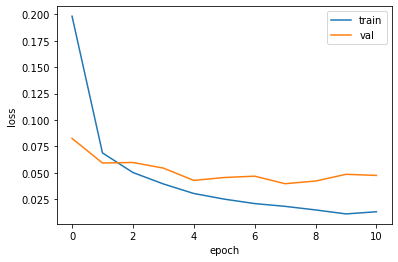

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [79]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0429 - accuracy: 0.9876


[0.04291604831814766, 0.9876000285148621]